#                                      Exploring IRIS Dataset


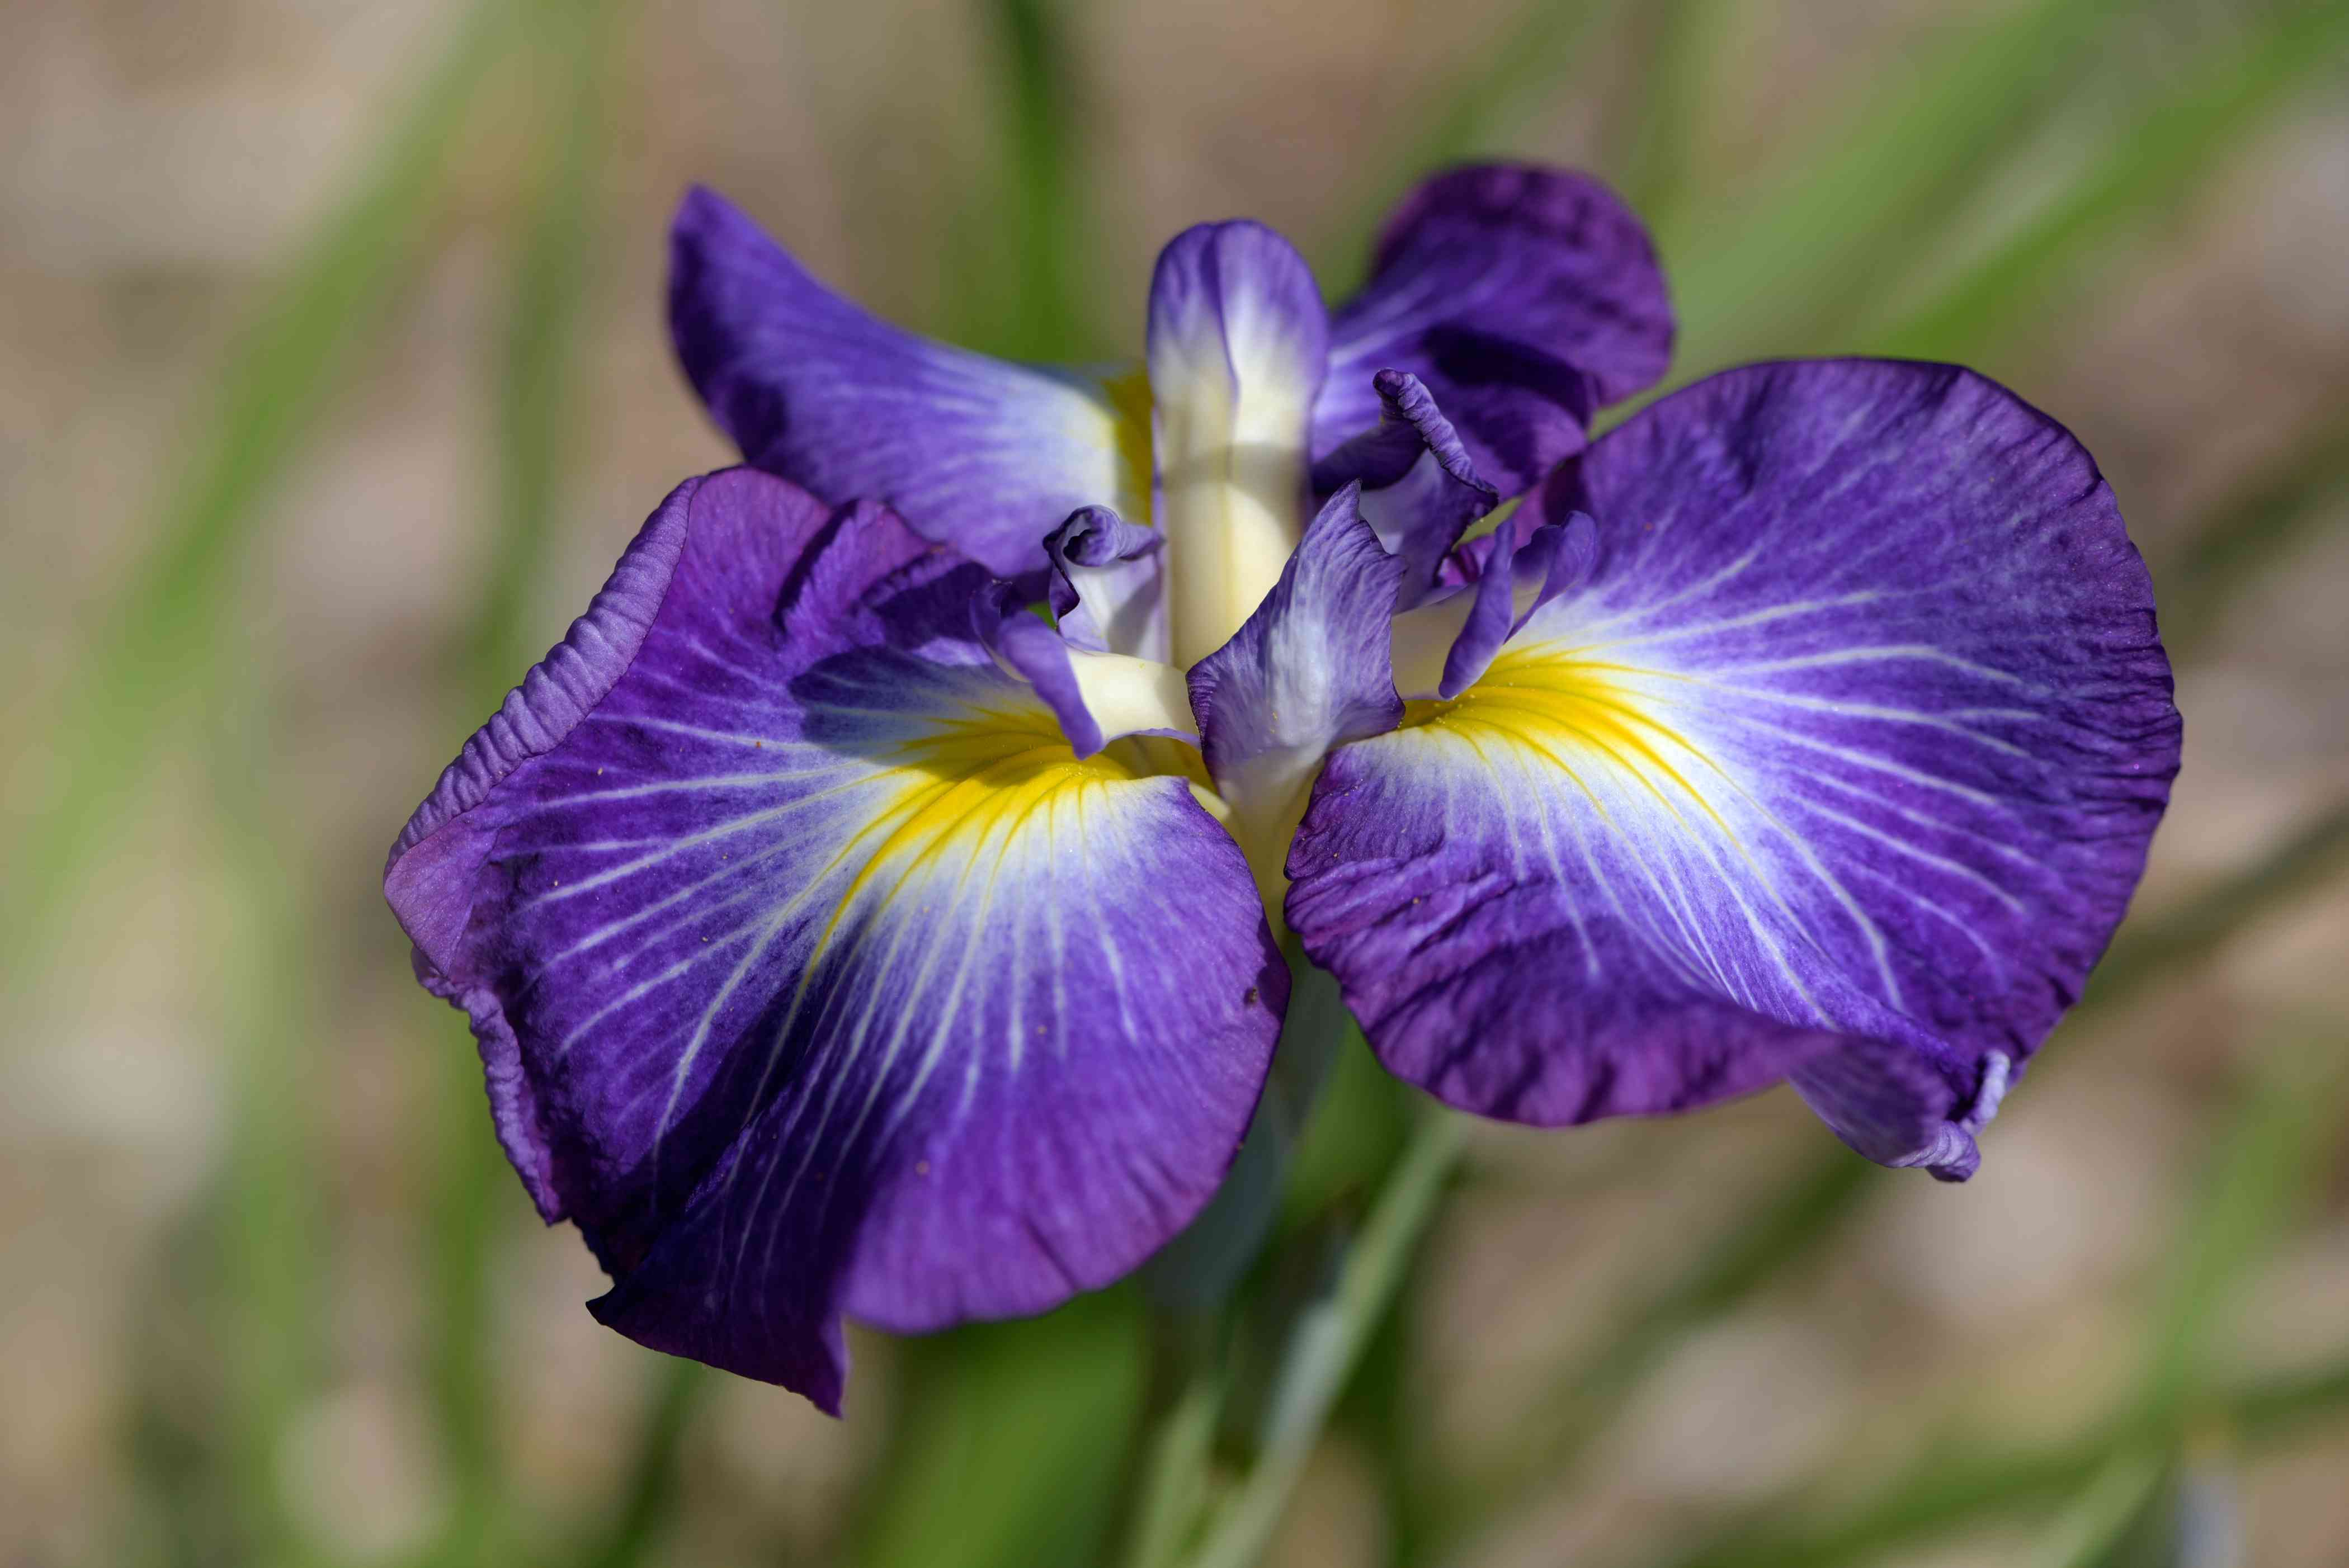

In [ ]:
# So this is the Iris Flower. Let's look at its data and explore 

In [1]:
#First, let's import the required libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


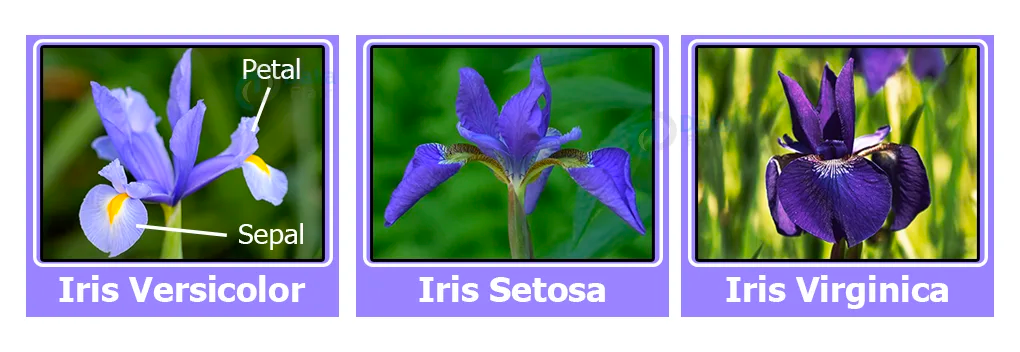

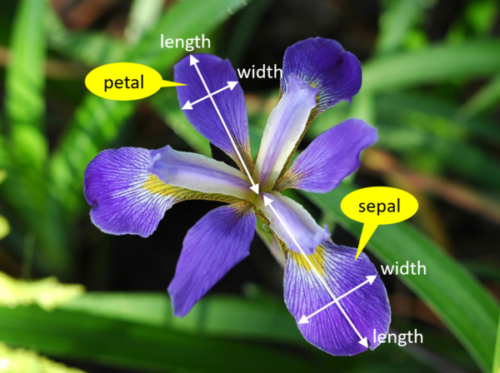

So, before going forward, we should understand what this data is all about. 
We can see columns like Petal_length, sepal_length, so it becomes essential to understand what they mean for further exploration
.

**Sepal Length**: This refers to the length of the sepal, which is the outermost part of the flower. Sepals are typically green and protect the flower bud before it blooms.

**Sepal Width**: This represents the width of the sepal, measured at its widest point.

**Petal Length**: This refers to the length of the petal, which is the brightly colored inner part of the flower. Petals are often used to attract pollinators like bees and butterflies.

**Petal Width**: This represents the width of the petal, measured at its widest point.

**Species**: This column indicates the species of each iris flower. In the dataset, there are three species: Setosa, Versicolor, and Virginica. Each row corresponds to a single iris flower, and the species column tells us which species it belongs to.

In [71]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [75]:
num_cols=data.describe().columns

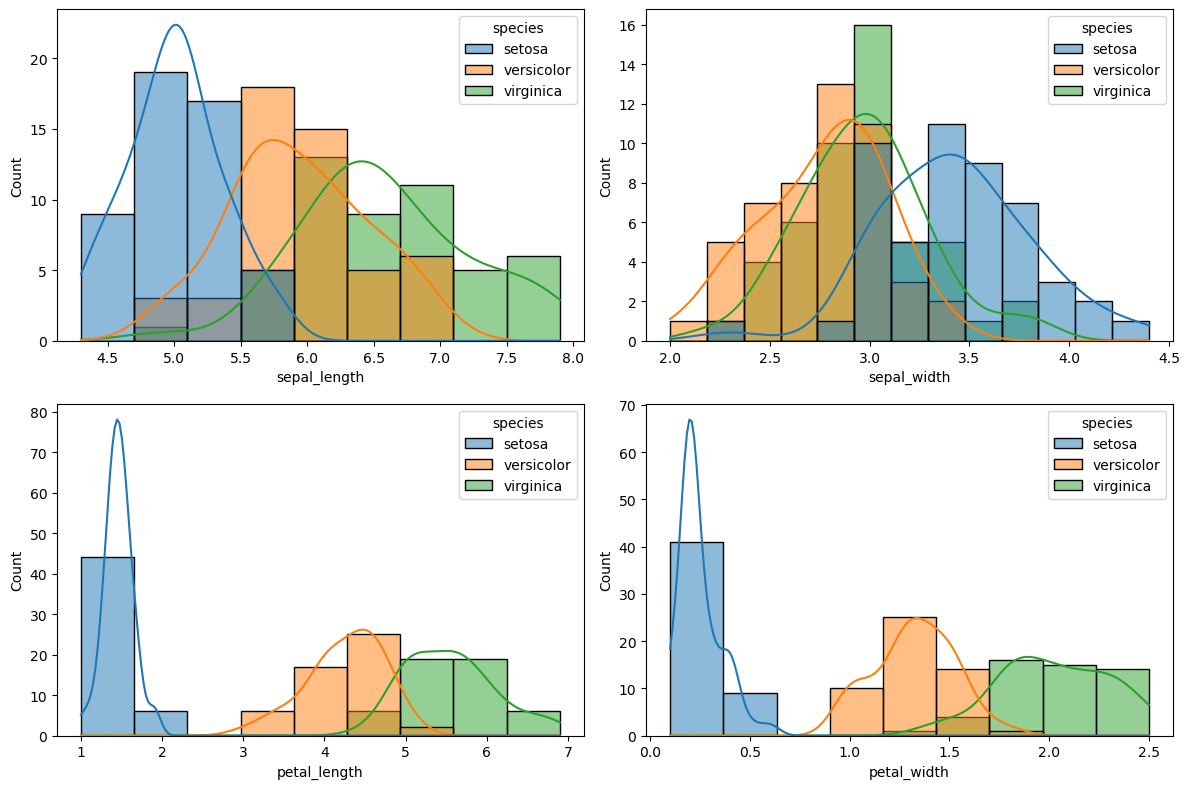

In [79]:
t=1
plt.figure(figsize=(12, 8))
for i in num_cols:
    plt.subplot(2, 2, t)
    sns.histplot(data=data, x=i, hue='species', kde=True)
    plt.tight_layout()
    t=t+1

## Inferences:

**Sepal Length Distribution**: We can see that the Setosa species tends to have shorter sepal lengths compared to the other two species.Versicolor and Virginica species have overlapping distributions, but Versicolor tends to have slightly longer sepal lengths on average compared to Virginica.

**Sepal Width Distribution:** The Setosa species tends to have wider sepals compared to Versicolor and Virginica, as seen by the peak at higher values.
Versicolor and Virginica have similar distributions of sepal widths, with some overlap between the two species.

**Petal Length Distribution:** Setosa species typically have shorter petal lengths compared to Versicolor and Virginica, as evidenced by the separation in the distributions.
Versicolor and Virginica have overlapping distributions, but Virginica tends to have longer petal lengths on average compared to Versicolor.

**Petal Width Distribution:**
Similar to petal length, Setosa species generally have narrower petals compared to Versicolor and Virginica.
Versicolor and Virginica have overlapping distributions, but Virginica tends to have wider petals on average compared to Versicolor.

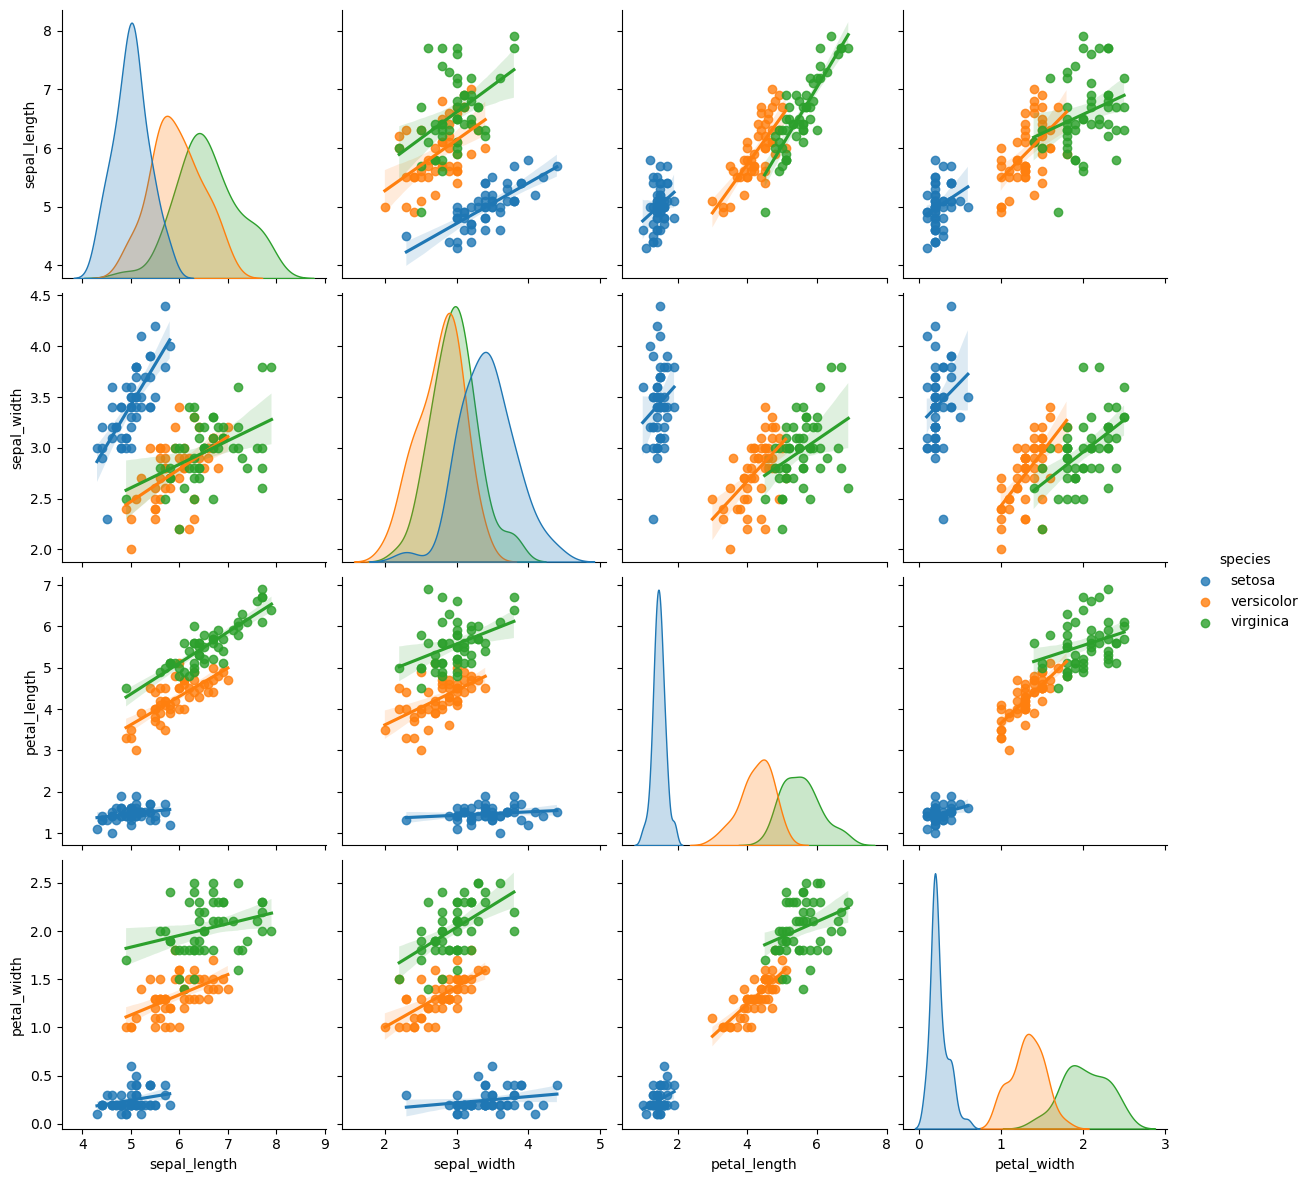

In [4]:
sns.pairplot(data=data, hue='species', height=3, kind='reg')

**Sepal Length vs. Sepal Width:** There is some separation between the Setosa species and the other two species based on sepal length and width.
Versicolor and Virginica species have more overlap in their distributions, especially in terms of sepal width.

**Sepal Length vs. Petal Length / Petal Width:**

There is a clear separation between Setosa and the other two species based on both petal length and petal width.
Versicolor and Virginica species have some overlap, but Virginica tends to have longer and wider petals on average compared to Versicolor.

**Sepal Width vs. Petal Length / Petal Width:**

There is less distinct separation between species based on sepal width compared to other features.
However, there is still some clustering of Setosa points at lower values of sepal width.

**Petal Length vs. Petal Width:**

This plot shows a clear separation between Setosa and the other two species based on both petal length and width.
Versicolor and Virginica species have overlapping distributions, but Virginica tends to have longer and wider petals on average compared to Versicolor.

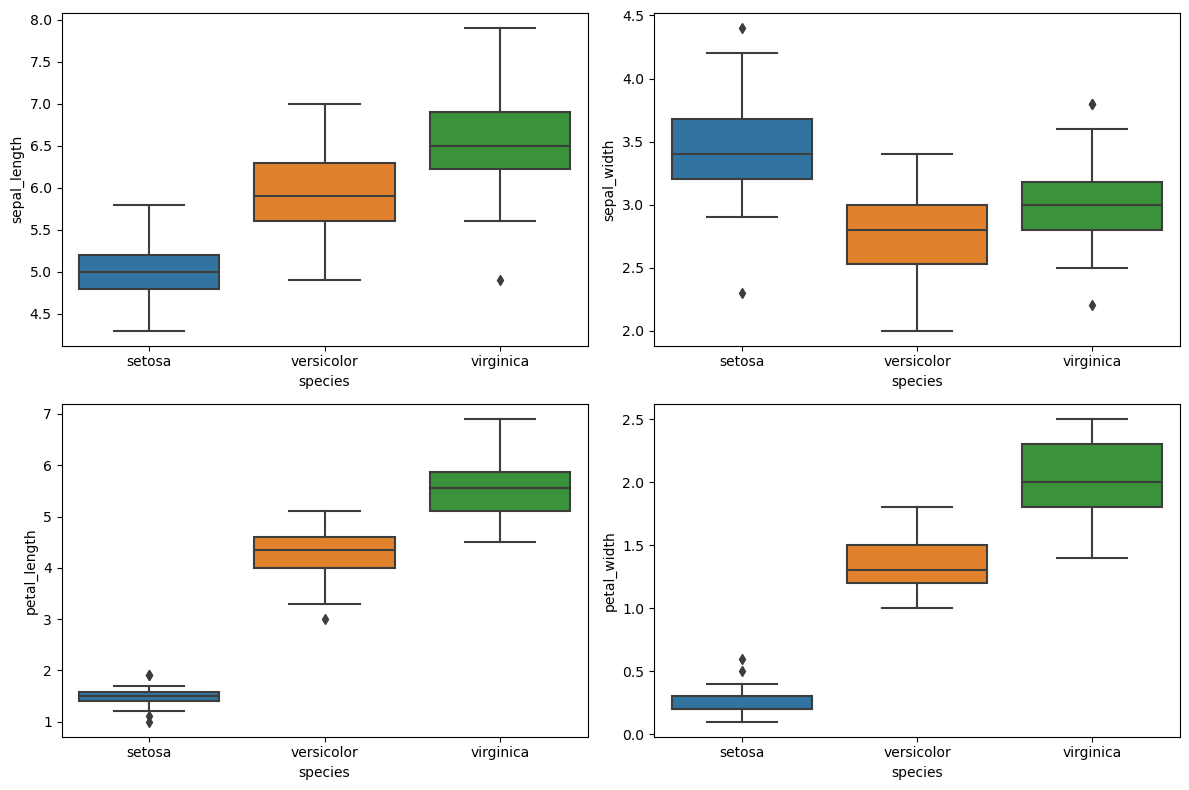

In [82]:
t=1
plt.figure(figsize=(12, 8))
for i in num_cols:
    plt.subplot(2, 2, t)
    sns.boxplot(data=data, y=i, x='species')
    plt.tight_layout()
    t=t+1

## Inference

**Sepal Length**: Setosa species generally has shorter sepal lengths compared to Versicolor and Virginica.
Versicolor and Virginica have similar median sepal lengths, but Virginica tends to have slightly longer sepal lengths on average.

**Sepal Width**: Setosa species tends to have wider sepals compared to Versicolor and Virginica.
Versicolor and Virginica have similar median sepal widths, but there is more variability in Versicolor.

**Petal Length:** Setosa species has significantly shorter petal lengths compared to Versicolor and Virginica.
Virginica tends to have longer petal lengths compared to Versicolor.

**Petal Width:**
Setosa species has significantly narrower petals compared to Versicolor and Virginica.
Virginica tends to have wider petals compared to Versicolor.

In [4]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
num_cols=data.drop(columns=['species']).columns
num_cols

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [9]:
cat_cols=['species']

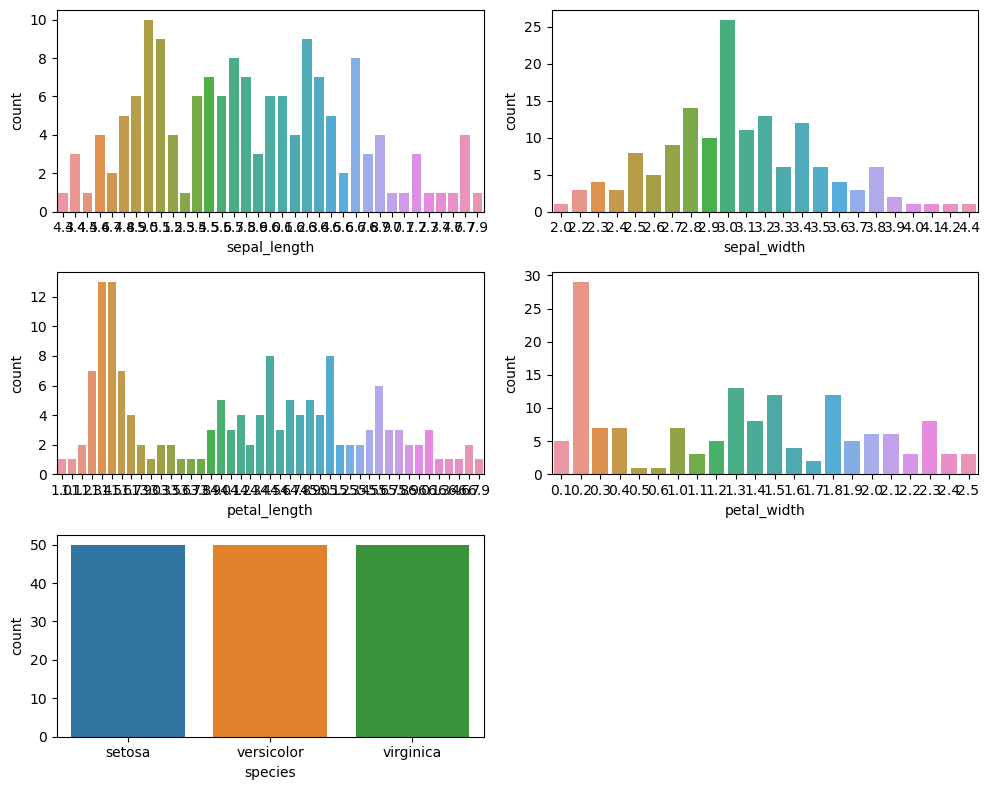

In [15]:
t=1
plt.figure(figsize=(10, 8))

for i in data.columns:
    plt.subplot(3,2,t)
    sns.countplot(data=data, x=data[i])
    plt.tight_layout()
    t=t+1

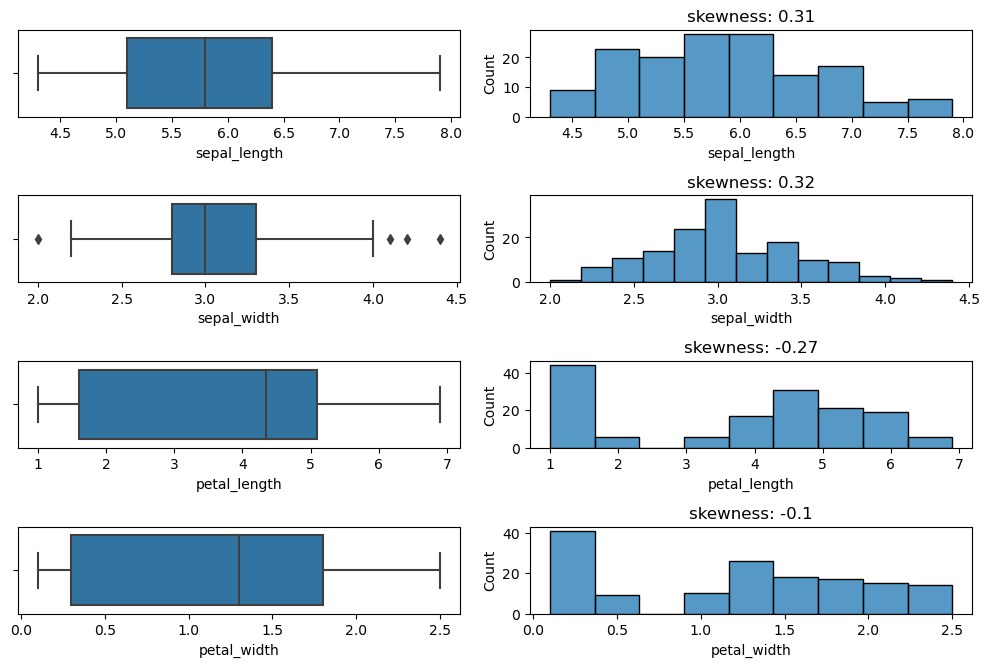

In [68]:
t=1
r=2
plt.figure(figsize=(10, 8))

for i in num_cols:
    plt.subplot(5,2,t)
    sns.boxplot(data=data, x=data[i])
    plt.subplot(5, 2, r)
    sns.histplot(data=data, x=data[i])
    plt.title(f'skewness: {round(data[i].skew(), 2)}')
    plt.tight_layout()
    t=t+2
    r=r+2

In [61]:
data['sepal_length'].skew()

0.3149109566369728

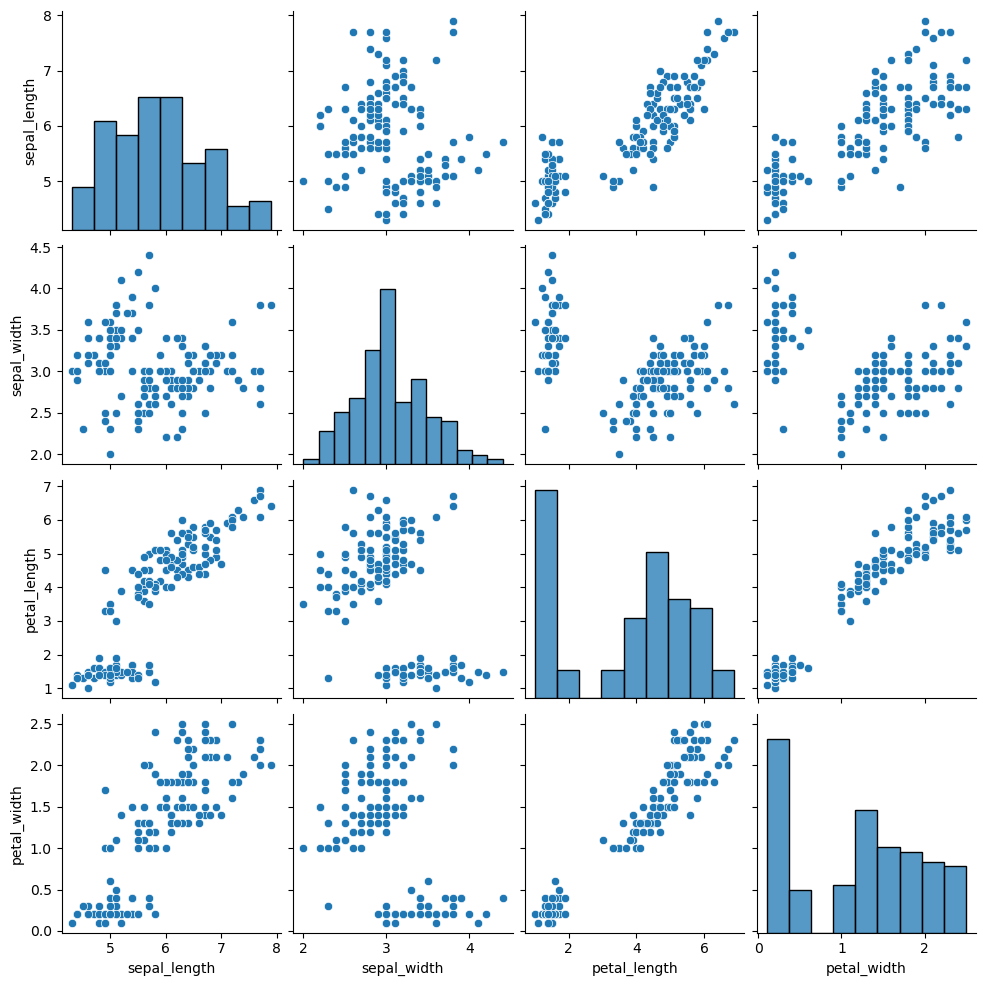

In [19]:
sns.pairplot(data=data)

<Axes: >

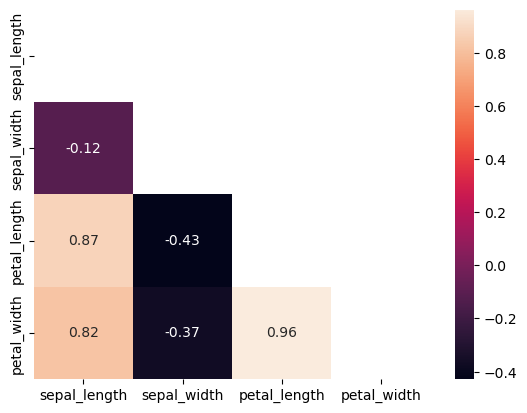

In [25]:
sns.heatmap(data[num_cols].corr(), annot=True, mask=np.triu(data[num_cols].corr()))

<Axes: ylabel='count'>

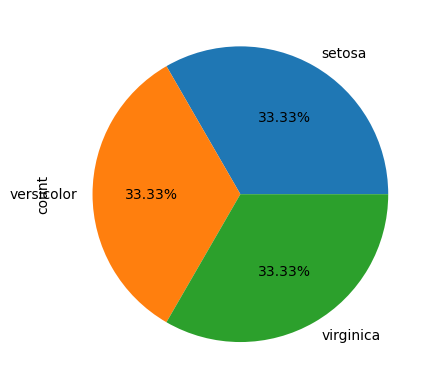

In [29]:
data['species'].value_counts().plot(kind='pie', autopct='%.2f%%')

In [ ]:
plt.pie(x=data['species'], autopct=)

In [14]:
data.petal_width.value_counts()

petal_width
0.2    29
1.3    13
1.8    12
1.5    12
1.4     8
2.3     8
1.0     7
0.4     7
0.3     7
2.1     6
2.0     6
0.1     5
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: count, dtype: int64

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [31]:
sc=StandardScaler()
mm=MinMaxScaler()

In [47]:
df=sc.fit_transform(data[num_cols])
df

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [55]:
Scaled_data=pd.DataFrame(df, columns=num_cols)
Scaled_data.head(50)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
5,-0.537178,1.939791,-1.169714,-1.052180
6,-1.506521,0.788808,-1.340227,-1.183812
7,-1.021849,0.788808,-1.283389,-1.315444
8,-1.748856,-0.362176,-1.340227,-1.315444
9,-1.143017,0.098217,-1.283389,-1.447076


In [38]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
demo_data=pd.DataFrame({'A': [1, 10, 18, 90],'B':[15, 10,30, 888], 'c': [150, 290, 887, 339], 'd':[22, 238, 998, 56]})
demo_data

,A,B,c,d
0,1,15,150,22
1,10,10,290,238
2,18,30,887,998
3,90,888,339,56


In [50]:
scaled=sc.fit_transform(demo_data)
scaled

array([[-0.81441573, -0.58609002, -0.95057251, -0.77562693],
       [-0.5594682 , -0.59936499, -0.45120984, -0.22901872],
       [-0.33284817, -0.5462651 ,  1.67821525,  1.6942324 ],
       [ 1.7067321 ,  1.73172011, -0.27643291, -0.68958675]])

In [43]:
scaled_demo_data=pd.DataFrame(scaled, columns=demo_data.columns)
scaled_demo_data

,A,B,c,d
0,-0.814416,-0.586090,-0.950573,-0.775627
1,-0.559468,-0.599365,-0.451210,-0.229019
2,-0.332848,-0.546265,1.678215,1.694232
3,1.706732,1.731720,-0.276433,-0.689587


In [51]:
mmsc=mm.fit_transform(demo_data)
mmsc

array([[0.        , 0.00569476, 0.        , 0.        ],
       [0.1011236 , 0.        , 0.18995929, 0.22131148],
       [0.19101124, 0.02277904, 1.        , 1.        ],
       [1.        , 1.        , 0.25644505, 0.03483607]])

<Axes: xlabel='sepal_width'>

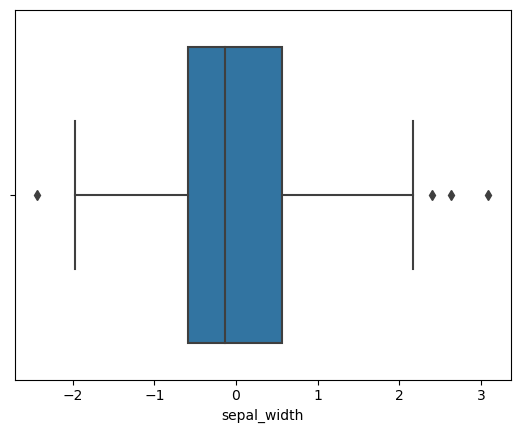

In [52]:
sns.boxplot(data=Scaled_data, x=Scaled_data['sepal_width'])

In [74]:
Scaled_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,-4.736952e-16,1.00335,-1.870024,-0.900681,-0.052506,0.674501,2.492019
sepal_width,150.0,-7.815970e-16,1.00335,-2.433947,-0.592373,-0.131979,0.558611,3.090775
petal_length,150.0,-4.263256e-16,1.00335,-1.567576,-1.226552,0.336478,0.762758,1.785832
petal_width,150.0,-4.736952e-16,1.00335,-1.447076,-1.183812,0.132510,0.790671,1.712096


In [9]:
q1= data[num_cols].quantile(.25)
q1

sepal_length    5.1
sepal_width     2.8
petal_length    1.6
petal_width     0.3
Name: 0.25, dtype: float64

In [10]:
q3=data[num_cols].quantile(.75)
q3

sepal_length    6.4
sepal_width     3.3
petal_length    5.1
petal_width     1.8
Name: 0.75, dtype: float64

In [12]:
iqr=q3-q1
iqr

sepal_length    1.3
sepal_width     0.5
petal_length    3.5
petal_width     1.5
dtype: float64

In [13]:
ul=q3+1.5*iqr
ul

sepal_length     8.35
sepal_width      4.05
petal_length    10.35
petal_width      4.05
dtype: float64

In [14]:
ll=q1-1.5*iqr
ll

sepal_length    3.15
sepal_width     2.05
petal_length   -3.65
petal_width    -1.95
dtype: float64

In [17]:
data[num_cols]>ul

,sepal_length,sepal_width,petal_length,petal_width
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
145,False,False,False,False
146,False,False,False,False
147,False,False,False,False
148,False,False,False,False


In [18]:
data[num_cols]<ll

,sepal_length,sepal_width,petal_length,petal_width
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
145,False,False,False,False
146,False,False,False,False
147,False,False,False,False
148,False,False,False,False


In [19]:
data[data[num_cols]<ll]

,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
145,NaN,NaN,NaN,NaN,NaN
146,NaN,NaN,NaN,NaN,NaN
147,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN


In [21]:
data[(data[num_cols]>ul) | (data[num_cols]<ll)]

,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
145,NaN,NaN,NaN,NaN,NaN
146,NaN,NaN,NaN,NaN,NaN
147,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

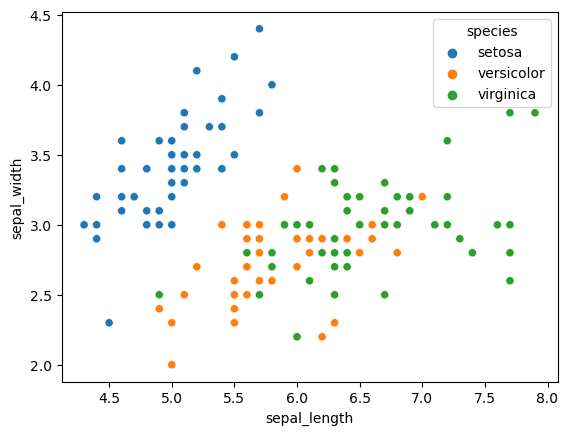

In [28]:
sns.scatterplot(x=data['sepal_length'], y=data['sepal_width'], hue='species', data=data)

<Axes: xlabel='species', ylabel='count'>

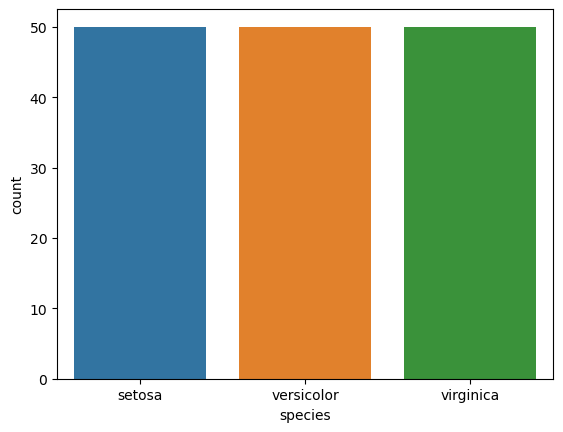

In [29]:
sns.countplot(x=data['species'], data=data)

<Axes: ylabel='Frequency'>

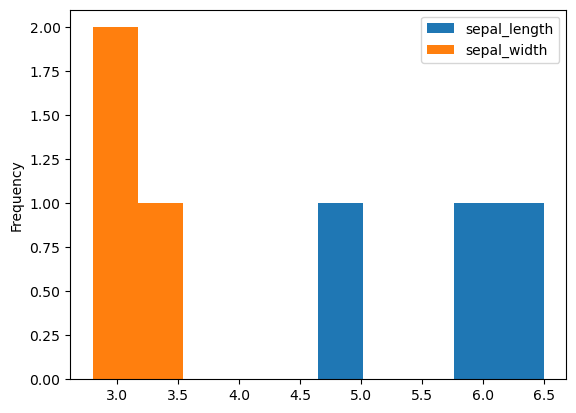

In [36]:
data.groupby(by="species")[["sepal_length",'sepal_width']].median().plot(kind="hist")

In [39]:
data[num_cols][data.sepal_length==5.1]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
17,5.1,3.5,1.4,0.3
19,5.1,3.8,1.5,0.3
21,5.1,3.7,1.5,0.4
23,5.1,3.3,1.7,0.5
39,5.1,3.4,1.5,0.2
44,5.1,3.8,1.9,0.4
46,5.1,3.8,1.6,0.2
98,5.1,2.5,3.0,1.1
